In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
df.drop(columns=df.columns[2:], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df['v1'] = df.pop('v1')
df.rename(columns={'v1' : 'Category', 'v2' : 'Message'}, inplace=True)
df.head()

,Message,Category
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [25]:
df.duplicated().sum()

403

In [26]:
print('Shape of the dataset before dropping the duplicates -', df.shape)
df.drop_duplicates(inplace=True)
print('Shape of the dataset after dropping the duplicates -', df.shape)

Shape of the dataset before dropping the duplicates - (5572, 2)
Shape of the dataset after dropping the duplicates - (5169, 2)


In [27]:
df.isnull().sum()

Message     0
Category    0
dtype: int64

In [28]:
df['Category'].value_counts()

Category
ham     4516
spam     653
Name: count, dtype: int64

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['Message'] = df['Message'].astype(str).apply(remove_stopwords)

[nltk_data] Downloading package stopwords to C:\Users\SOHAM
[nltk_data]     MAITY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\SOHAM
[nltk_data]     MAITY\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [30]:
df.head()

,Message,Category
0,"Go jurong point , crazy .. Available bugis n g...",ham
1,Ok lar ... Joking wif u oni ...,ham
2,Free entry 2 wkly comp win FA Cup final tkts 2...,spam
3,U dun say early hor ... U c already say ...,ham
4,"Nah n't think goes usf , lives around though",ham


In [31]:
from sklearn.preprocessing import LabelEncoder
df['Category'] = LabelEncoder().fit_transform(df['Category'])

df.head()

,Message,Category
0,"Go jurong point , crazy .. Available bugis n g...",0
1,Ok lar ... Joking wif u oni ...,0
2,Free entry 2 wkly comp win FA Cup final tkts 2...,1
3,U dun say early hor ... U c already say ...,0
4,"Nah n't think goes usf , lives around though",0


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, confusion_matrix, classification_report

X = df['Message']
Y = df['Category']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test).toarray()

-------------------- Bernoulli Naive Bayes Classifier --------------------
Train Precision Score : 0.989247311827957
Test Precision Score : 1.0

Classification Report :-
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1472
           1       1.00      0.70      0.82       234

    accuracy                           0.96      1706
   macro avg       0.98      0.85      0.90      1706
weighted avg       0.96      0.96      0.96      1706



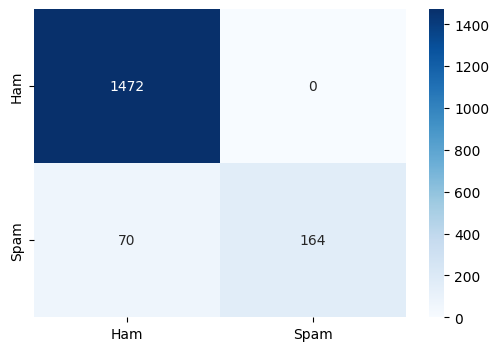

-------------------- Multinomial Naive Bayes Classifier --------------------
Train Precision Score : 0.9785714285714285
Test Precision Score : 0.9427312775330396

Classification Report :-
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1472
           1       0.94      0.91      0.93       234

    accuracy                           0.98      1706
   macro avg       0.96      0.95      0.96      1706
weighted avg       0.98      0.98      0.98      1706



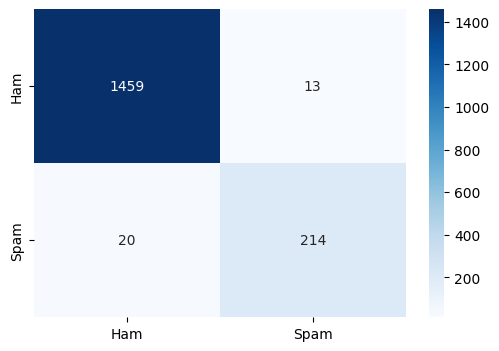

-------------------- Complement Naive Bayes Classifier --------------------
Train Precision Score : 0.8489795918367347
Test Precision Score : 0.8088235294117647

Classification Report :-
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      1472
           1       0.81      0.94      0.87       234

    accuracy                           0.96      1706
   macro avg       0.90      0.95      0.92      1706
weighted avg       0.97      0.96      0.96      1706



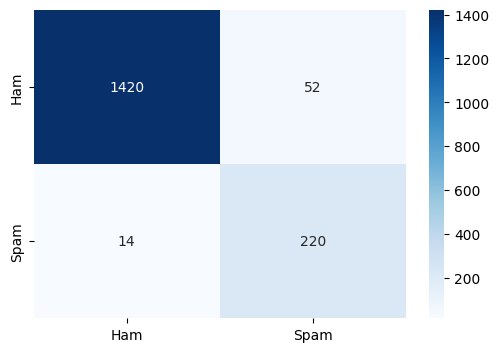

In [37]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB

bnbc = BernoulliNB()
mnbc = MultinomialNB()
com_nbc = ComplementNB()

nb_model_dict = {'Bernoulli Naive Bayes Classifier' : bnbc, 'Multinomial Naive Bayes Classifier' : mnbc, 'Complement Naive Bayes Classifier' : com_nbc}

for nb_model in nb_model_dict:
    print(f'-------------------- {nb_model} --------------------')
    model = nb_model_dict[nb_model]
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    # Since in this scenario i.e, in spam and not-spam (ham) classification FP is more sensitive or more dangerous than FN so we have to considered the best precision score.
    print('Train Precision Score :', precision_score(Y_train, Y_pred_train))
    print('Test Precision Score :', precision_score(Y_test, Y_pred_test))
    print('\nClassification Report :-\n', classification_report(Y_test, Y_pred_test))
    
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(Y_test, Y_pred_test)
    class_names = ['Ham', 'Spam']
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.show()

In [ ]:
# import pickle

# with open('Spam-Ham_Message_Classifier.pkl', 'wb') as file:
#     pickle.dump(mnbc, file)
    
# with open('Spam-Ham_Message_Classifier.pkl', 'wb') as file:
#     loaded_model = pickle.load(file)
    
# print('Precision Score of the loaded model :', loaded_model.score(X_test, Y_test))